# E-Bike Stopping Distances

[Project extensions are at the bottom of this file]

How far will an e-bike skid before coming to a complete stop?

In this project we will model the relationship between speeds and stopping distances for electric bicycles.

### Loading the Data
The main file for this project is `ebike-stopping-distances.csv`. This contains distances an e-bike traveled before coming to a complete stop after slamming both front and rear brakes. These experiments were conducted on a gravel road.

Load the data into python and take a look.

Activity Goals:
- Load the stopping distance data.
- Display the dataframe.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'ebike-stopping-distances.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
df = pd.read_csv('ebike-stopping-distances.csv')
df #display the dataframe

,speed,distance
0,15.4,3.6
1,16.2,3.8
2,17.2,4.3
3,19.4,5.1
4,25.7,7.6
5,26.8,8.5
6,32.6,9.9
7,34.7,11.9
8,36.3,14.2


The fastest speed in this data is 36.3 kilometers per hour, where the e-bike took 14.2 meters to come to a complete stop.

### Visualizing the Data
Let's quickly visualize the relationship between speed and stopping distance. A scatter plot is a good choice.

Since speed predicts stopping distance, we'll place speed along the x axis.

Activity Goals:
- Draw a scatter plot of distance vs speed.
- Label both axes.

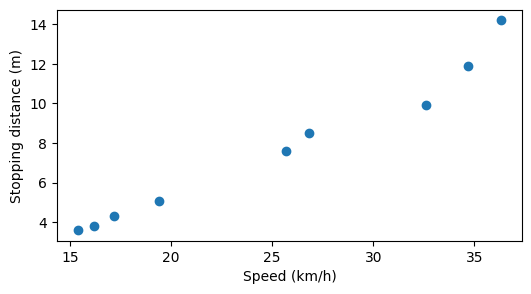

In [3]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Stopping distance (m)')
plt.show()

As speed increases, stopping distance also increases.

Let's build a mathematical model to describe the relationship between these two variables. We'll start by fitting a simple linear model.

### Fitting a Linear model

For this course, we've provided the following python class to use as our Linear Model.

This class leverages the scikit-learn library to fit a line to x and y data using linear regression. 

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
        
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)
        
    def predict(self, x):
        return self.slope * x + self.intercept

    def plot_model(self, x_min, x_max, color="black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color=color)
        
    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'Parameters: slope = {m:.2f}, intercept = {b:.2f}')
        print(f'Equation: y = {m:.2f}x + {b:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')

Let's use this LinearModel class to fit our stopping distance data.

Activity Goals:
- Create a new LinearModel.
- Fit the model to the speed and distance data.
- Print the model info.

In [5]:
linear = LinearModel()
linear.fit(x=df['speed'], y=df['distance'])
linear.print_model_info()

LinearModel():
Parameters: slope = 0.45, intercept = -3.64
Equation: y = 0.45x + -3.64
Goodness of Fit (R²): 0.968


From the model parameters we see that the best fitting line has a slope of 0.45. The goodness of fit metric (R²) indicates that 96.8% of the variance is explained by the model, which is a very good fit.

Let's use the `plot_model( )` method to get a visual sense for the quality of this model.

Activity Goal:
- Plot the linear model from 0 to 40 km/h.

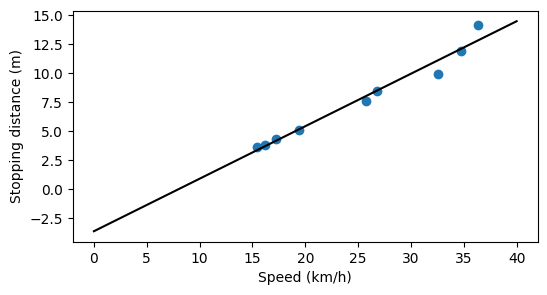

In [6]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Stopping distance (m)')
linear.plot_model(0, 40)

The linear model fits the data points well. Most points are close to the line, indicating a strong relationship.

### Sanity Checking the Model
Even though this linear model closely fits the data, there is a visible issue with the model, especially when considering the physics involved.

When an e-bike is not moving at all, it should take zero meters to stop. However, the model plot shows a negative stopping distance for zero speed.

To make it easier to visualize, let's add axis lines to our plot using the `axhline` and `axvline` methods.

Activity Goals:
- Add horizontal axis line.
- Add vertical axis line.

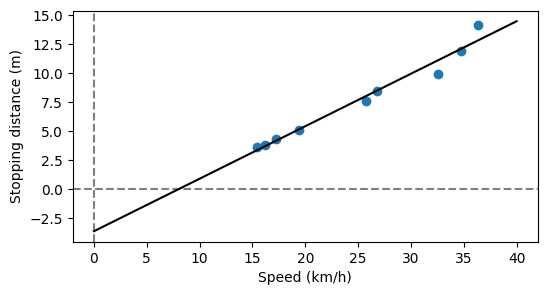

In [7]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Stopping distance (m)')
linear.plot_model(0,40)
plt.axhline(color='black', alpha=0.5, linestyle='--')
plt.axvline(color='black', alpha=0.5, linestyle='--')
plt.show()

Even though the model fits the data, it doesn’t pass our sanity check about what should happen at zero speed. Let's improve the modeling to account for this.

### Low Speed Data
This project also includes `ebike-data-low-speed.csv`. Let's see if this low-speed data provides a better sense of what the relationship looks like near zero velocity.

Activity Goals:
- Load the low-speed data.
- Display the dataframe.

In [8]:
df_low = pd.read_csv('ebike-data-low-speed.csv')
df_low #display the DataFrame

,speed,distance
0,0.0,0.00
1,2.0,0.04
2,3.0,0.10
3,5.0,0.20
4,7.0,0.33
5,8.0,0.86
6,10.0,1.50
7,11.0,1.79
8,13.0,2.26


This has data from speeds from 0 up to 13 km/h.

Let's plot this low speed data together with the original data. We'll use different colors so we can keep the datasets distinct.

To make our lives easier, we can define a reusable function that will label and format the axes for us.

In [9]:
def format_axes():
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Stopping distance (m)')
    plt.axhline(color='black', alpha=0.5, linestyle='--')
    plt.axvline(color='black', alpha=0.5, linestyle='--')

Activity Goals:
- Draw the original scatter with color `C0`.
- Draw the low-speed scatter with color `C1`.
- Plot the model from 0 to 40 km/h.
- Format the axes.

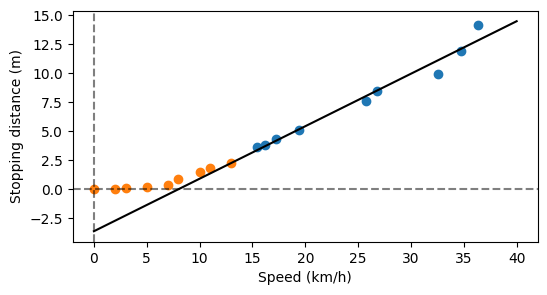

In [10]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'], color='C0')
plt.scatter(df_low['speed'], df_low['distance'], color='C1')
linear.plot_model(0, 40)
format_axes()

The linear model does not fit the data well at low speeds, especially below 8 km/hr.

### Quadratic Model
The low-speed data shows us that the relationship isn't a straight line. It has some curvature to it. A quadratic curve is a common choice when modeling a moderate amount of curvature.

A quadratic equation is a second-degree polynomial of the form:

`y = ax² + bx + c`

Note: The equation for kinetic energy from physics (`KE = 1⁄2mv²`) is also quadratic. Since stopping needs to overcome kinetic energy, a quadratic model is a natural choice.

Here is the QuadraticModel python class:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

class QuadraticModel:
    def fit(self, x, y):
        x = pd.DataFrame(x)
        quadratic = PolynomialFeatures(degree=2)
        quad_features = quadratic.fit_transform(x)
        quad_model = LinearRegression().fit(quad_features, y)
        y_pred = quad_model.predict(quad_features)
        self.a = quad_model.coef_[2]
        self.b = quad_model.coef_[1]
        self.c = quad_model.intercept_
        self.rsquared = r2_score(y, y_pred)
        
    def predict(self, x):
        return self.a*x**2 + self.b*x + self.c
       
    def plot_model(self, xmin, xmax):
        xvals = range(xmin, xmax+1)
        yvals = [self.predict(x) for x in xvals]
        plt.plot(xvals, yvals, color='black')
        
    def print_model_info(self):
        a = self.a
        b = self.b
        c = self.c
        rsquared = self.rsquared
        print('QuadraticModel')
        print(f'Parameters: a = {a:.2f}, b = {b:.2f}, c = {c:.2f}')
        print(f'Equation: y = {self.a:.2f}x² + {self.b:.2f}x + {self.c:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')

Pandas has a `pd.concat()` method we can use to combine both df and df_low into a single DataFrame. This will allow us to fit the `QuadraticModel` to the full range of speeds.

Activity Goals:
- Combine data into `df_all`.
- Instantiate a new `QuadraticModel`.
- Fit the model.
- Print the model info.

In [12]:
df_all = pd.concat([df, df_low])
quadratic = QuadraticModel()
quadratic.fit(df_all['speed'], df_all['distance'])
quadratic.print_model_info()

QuadraticModel
Parameters: a = 0.01, b = 0.14, c = -0.43
Equation: y = 0.01x² + 0.14x + -0.43
Goodness of Fit (R²): 0.989


This model accounts for 98.9% of the variance in the data, which is an even better fit than what we saw with the linear model.

### Plot the Quadratic Model

Let's visualize how well our quadratic model follows the curve of the scatterplot.

Activity Goals:
- Plot the model from 0 to 40 km/h.
- Format the axes.

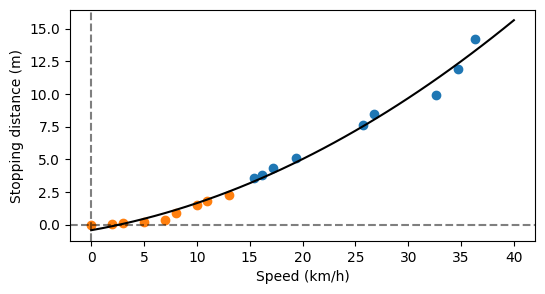

In [13]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'], color='C0')
plt.scatter(df_low['speed'], df_low['distance'], color='C1')
quadratic.plot_model(0, 40)
format_axes()

The quadratic model provides a better fit than the linear model.

### Predicting High Speed Data

This project also includes some high-speed data: `ebike-data-high-speed.csv`.

Let's load it up and take a look. Run the code below.

In [14]:
df_high = pd.read_csv('ebike-data-high-speed.csv')
df_high

,speed,distance
0,38,14.35
1,39,15.09
2,42,17.74
3,42,15.75
4,42,17.61
...,...,...
10,56,24.51
11,58,34.31
12,59,30.01
13,61,31.59


This data goes up to speeds of 61 km/h.

Let's see how well our quadratic model can predict this new data that it wasn't trained on. Run the code below, which will plot the high speed data in green.

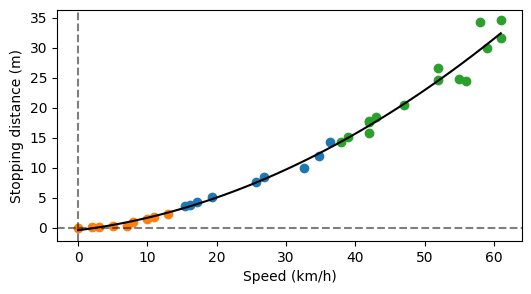

In [15]:
plt.figure(figsize=(6, 3))
plt.scatter(df['speed'], df['distance'], color='C0')
plt.scatter(df_low['speed'], df_low['distance'], color='C1')
plt.scatter(df_high['speed'], df_high['distance'], color='C2')
quadratic.plot_model(0, 61)
format_axes()

### Summary
In this project, we started with a linear model. While this provided a good fit for the initial data, it deviated from our physical intuition at zero speed.

We brought in some low-speed data and changed to a quadratic model. The quadratic model provided a better fit to the curved relationship.

Finally we tested our quadratic model on high-speed data.... Using visual inspection of the graph, the model was able to predict the high-speed data with reasonable accuracy.

## Project extensions

The following is a proposed idea for an extension.

The file `car-stopping-distances.csv` contains data on stopping distances (in meters) for cars traveling at various speeds (in kilometers per hour).

Would a linear or quadratic model provide a better fit for this dataset?

In [16]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'car-stopping-distances.csv'.

# from google.colab import files
# uploaded = files.upload()

In [17]:
# YOUR CODE HERE (add new cells as needed)
cars = pd.read_csv('car-stopping-distances.csv')
cars

,speed,site,dist
0,40,1.0,7.48
1,40,2.0,10.50
2,40,3.0,10.33
3,40,4.0,11.73
4,60,1.0,16.99
...,...,...,...
12,100,1.0,43.47
13,100,2.0,42.18
14,100,3.0,41.44
15,100,4.0,43.99


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv("car-stopping-distances.csv")

In [ ]:
# Group by speed to get average stopping distances
df_avg = df.groupby('speed', as_index=False)['dist'].mean()

In [ ]:
# Fit Linear Model
X = df_avg[['speed']]
y = df_avg['dist']

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

In [4]:
# Fit Quadratic Model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

quadratic_model = LinearRegression()
quadratic_model.fit(X_poly, y)
y_pred_quad = quadratic_model.predict(X_poly)

In [5]:
# Compare the Mean Squared Error (MSE)
mse_linear = mean_squared_error(y, y_pred_linear)
mse_quad = mean_squared_error(y, y_pred_quad)

print("Linear MSE:", mse_linear)
print("Quadratic MSE:", mse_quad)

Linear MSE: 13.49822653716215
Quadratic MSE: 0.8867816458026491


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


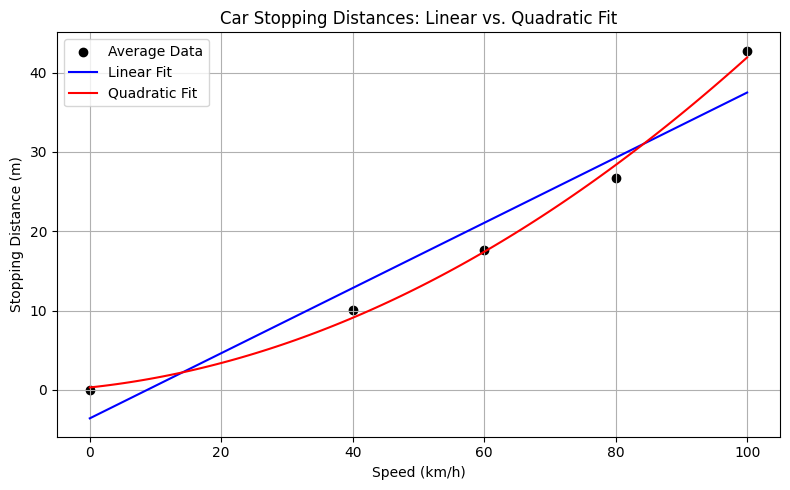

In [6]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df_avg['speed'], df_avg['dist'], label='Average Data', color='black')

# Linear line
plt.plot(df_avg['speed'], y_pred_linear, label='Linear Fit', color='blue')

# Quadratic curve
speed_range = np.linspace(df_avg['speed'].min(), df_avg['speed'].max(), 100).reshape(-1, 1)
speed_range_poly = poly.transform(speed_range)
y_quad_line = quadratic_model.predict(speed_range_poly)
plt.plot(speed_range, y_quad_line, label='Quadratic Fit', color='red')

plt.xlabel("Speed (km/h)")
plt.ylabel("Stopping Distance (m)")
plt.title("Car Stopping Distances: Linear vs. Quadratic Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()